In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/content/drive/Othercomputers/My Laptop/Drive/Jupyter/stroke-data.csv')
dataset
dataset['Residence'] = dataset['Residence'].astype('object')
dataset['Married'] = dataset['Married'].astype('object')
dataset.info()
dataset.isnull().sum()
dataset.BMI.replace(to_replace=np.nan, value=dataset.BMI.mean(), inplace=True)
dataset.describe()
dataset.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9470 entries, 0 to 9469
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9470 non-null   int64  
 1   Gender                  9470 non-null   object 
 2   Age                     9470 non-null   int64  
 3   Hypertensive            9470 non-null   int64  
 4   Heart_Problems          9470 non-null   int64  
 5   Married                 9470 non-null   object 
 6   Work_Type               9470 non-null   object 
 7   Residence               9470 non-null   object 
 8   Average_Gulucose_Level  9470 non-null   float64
 9   BMI                     9470 non-null   float64
 10  Smoking                 9470 non-null   object 
 11  Stroke                  9470 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 887.9+ KB


,ID,Age,Hypertensive,Heart_Problems,Average_Gulucose_Level,BMI,Stroke
ID,1.000000,0.195689,0.416888,-0.031915,0.112912,0.217619,0.047665
Age,0.195689,1.000000,0.221530,0.171999,0.194056,0.291474,0.129512
Hypertensive,0.416888,0.221530,1.000000,0.030055,0.122533,0.143779,0.059488
Heart_Problems,-0.031915,0.171999,0.030055,1.000000,0.139361,-0.013653,0.099581
Average_Gulucose_Level,0.112912,0.194056,0.122533,0.139361,1.000000,0.118937,0.439466
BMI,0.217619,0.291474,0.143779,-0.013653,0.118937,1.000000,0.200006
Stroke,0.047665,0.129512,0.059488,0.099581,0.439466,0.200006,1.000000


In [ ]:
print(dataset['Gender'].unique())

['Male' 'Female' 'Other']


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9470 entries, 0 to 9469
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      9470 non-null   int64  
 1   Gender                  9470 non-null   object 
 2   Age                     9470 non-null   int64  
 3   Hypertensive            9470 non-null   int64  
 4   Heart_Problems          9470 non-null   int64  
 5   Married                 9470 non-null   object 
 6   Work_Type               9470 non-null   object 
 7   Residence               9470 non-null   object 
 8   Average_Gulucose_Level  9470 non-null   float64
 9   BMI                     9470 non-null   float64
 10  Smoking                 9470 non-null   object 
 11  Stroke                  9470 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 887.9+ KB


In [ ]:
dataset.isnull().sum()

ID                        0
Gender                    0
Age                       0
Hypertensive              0
Heart_Problems            0
Married                   0
Work_Type                 0
Residence                 0
Average_Gulucose_Level    0
BMI                       0
Smoking                   0
Stroke                    0
dtype: int64

In [ ]:
dataset.describe()

,ID,Age,Hypertensive,Heart_Problems,Average_Gulucose_Level,BMI,Stroke
count,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000,9470.000000
mean,4735.500000,48.399894,0.307920,0.052376,111.477103,29.850570,0.054805
std,2733.897858,22.252975,0.461658,0.222796,45.501343,9.988247,0.227611
min,1.000000,0.000000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,2368.250000,34.000000,0.000000,0.000000,81.972500,24.700000,0.000000
50%,4735.500000,52.000000,0.000000,0.000000,98.070000,29.700000,0.000000
75%,7102.750000,66.000000,1.000000,0.000000,121.430000,35.375000,0.000000
max,9470.000000,85.000000,1.000000,1.000000,288.550000,103.400000,1.000000


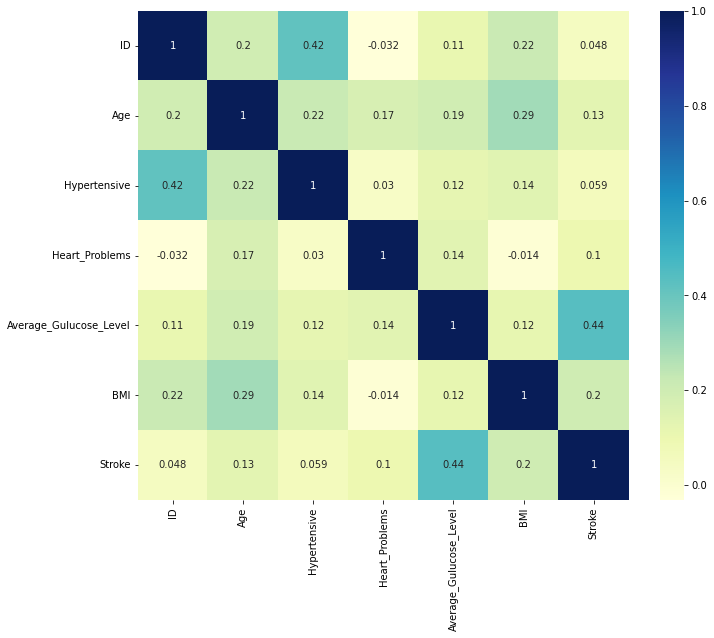

In [ ]:
# correlation matrix
corr = dataset.corr()

#  mask generation  for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#  heatmap with the mask and correct aspect ratio
sns.heatmap(dataset.corr(),cmap="YlGnBu", annot=True)

Female    5374
Male      4095
Other        1
Name: Gender, dtype: int64


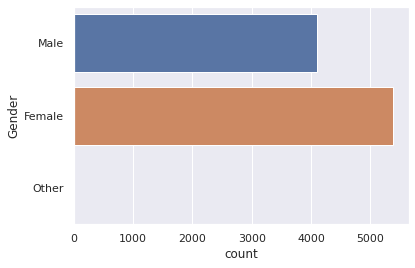

0    6554
1    2916
Name: Hypertensive, dtype: int64


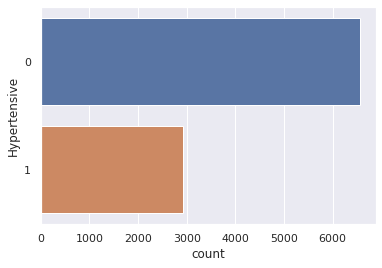

Yes    6509
No     2961
Name: Married, dtype: int64


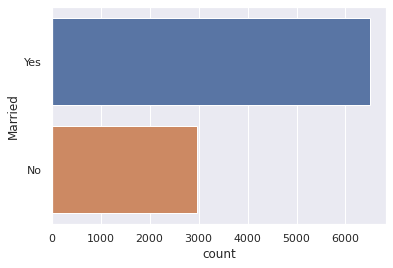

Private          4829
Govt_job         2531
Self-employed     819
children          687
Children          582
Never_worked       22
Name: Work_Type, dtype: int64


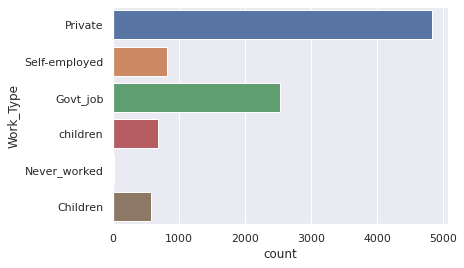

Rural    4818
Urban    4652
Name: Residence, dtype: int64


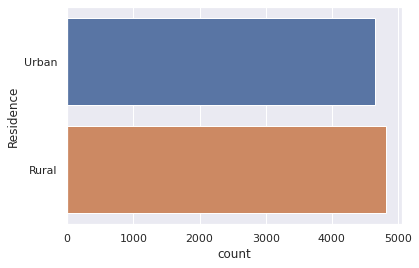

never smoked       3552
Unknown            2824
formerly smoked    1645
smokes             1449
Name: Smoking, dtype: int64


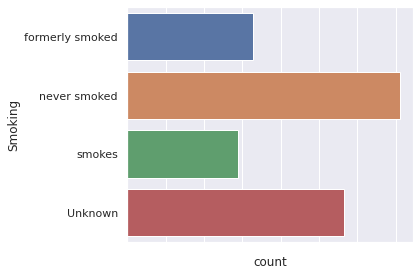

0    8951
1     519
Name: Stroke, dtype: int64


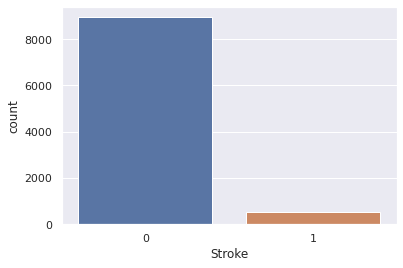

In [ ]:
print(dataset.Gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, y="Gender")
plt.show()

print(dataset.Hypertensive.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, y="Hypertensive")
plt.show()


print(dataset.Married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, y="Married")
plt.show()

print(dataset.Work_Type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, y="Work_Type")
plt.show()

print(dataset.Residence.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, y="Residence")
plt.show()

print(dataset.Smoking.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, y="Smoking")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

print(dataset.Stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Stroke")
plt.show()

0    6554
1    2916
Name: Hypertensive, dtype: int64


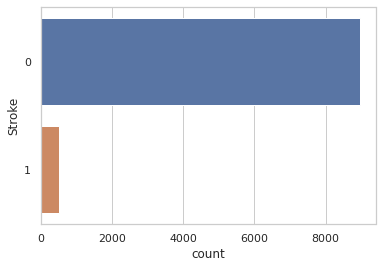

In [ ]:

print(dataset.Hypertensive.value_counts())
sns.set_theme(style="whitegrid")
ax = sns.countplot(data=dataset, y="Stroke")
plt.show()



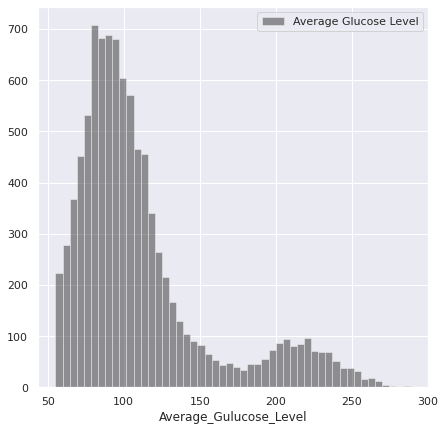

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.Average_Gulucose_Level, color="Black", label="Average Glucose Level", kde= False)
plt.legend()


#1. Normal Gluscose: 80-140 mg/dL. Most of people are having Normal Glucose levels. Means not suffering from diabetes.

#2. Pre-diabetes: 140-200 mg/dL. Graph shows less people are pre-diabetic.

#3. Diabetic: >200 mg/dL. From grapgh, density is more as compare to pre-diabetes.

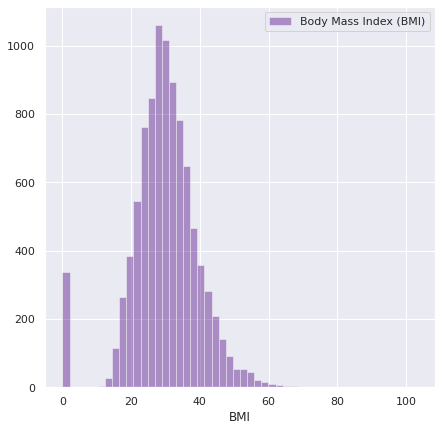

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.BMI, color="Indigo", label="Body Mass Index (BMI)", kde= False)
plt.legend()

#1. BMI <19 Under weight. Less people are overweight.

#2. BMI in 19-25: Normal weight.Good amount of people are Normal..

#3. BMI > 25: overweight or obese. More people are overweight.

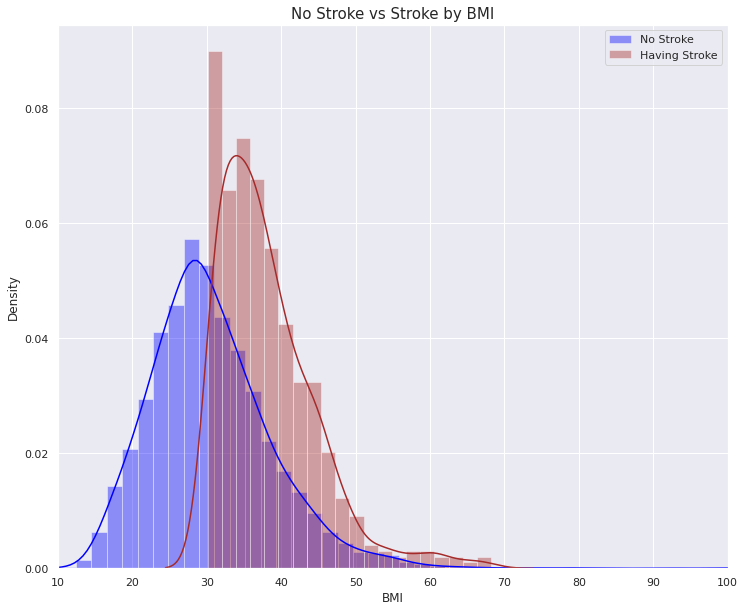

In [ ]:
#No Stroke vs Stroke by BMI 
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['Stroke'] == 0]["BMI"], color='blue', label="No Stroke") # No Stroke - green
sns.distplot(dataset[dataset['Stroke'] == 1]["BMI"], color='brown',label = "Having Stroke") # Stroke - Red

sns.set_theme(style="darkgrid")
plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.legend()
plt.show()

#Density of overweight people have more stroke cases

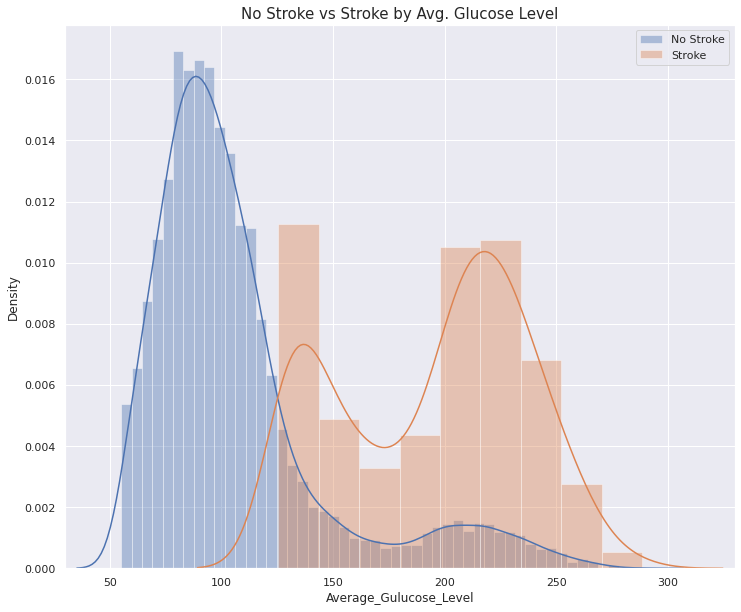

In [ ]:
#No_Stroke vs Stroke according to Avg. Glucose Level
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['Stroke'] == 0]["Average_Gulucose_Level"], label="No Stroke") #No Stroke - green
sns.distplot(dataset[dataset['Stroke'] == 1]["Average_Gulucose_Level"], label="Stroke") # Stroke - Red

sns.set_theme(style="darkgrid")
plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.legend()
plt.show()

#The density of people having glucose level <100 suffered stroke more prevalent.

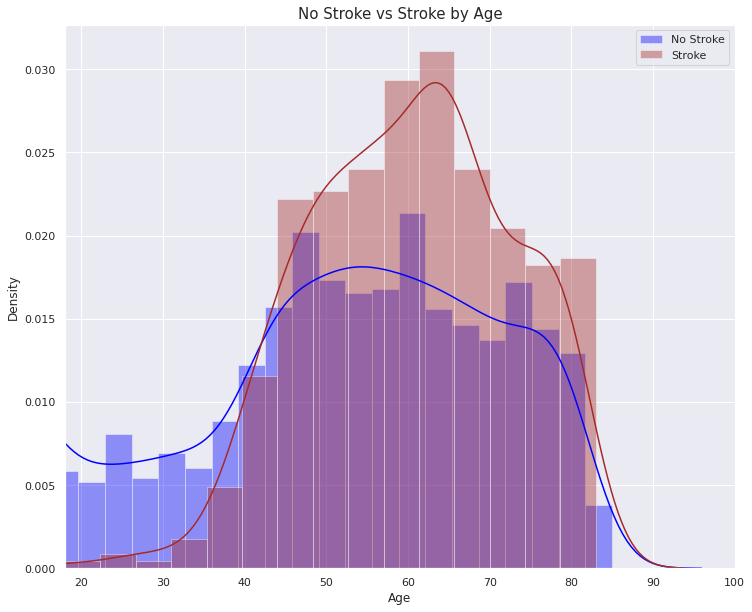

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['Stroke'] == 0]["Age"], color='blue',label="No Stroke") # No Stroke: Green
sns.distplot(dataset[dataset['Stroke'] == 1]["Age"], color='brown',label="Stroke") # Stroke: Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
sns.set_theme(style="darkgrid")
plt.xlim([18,100])
plt.legend()
plt.show()

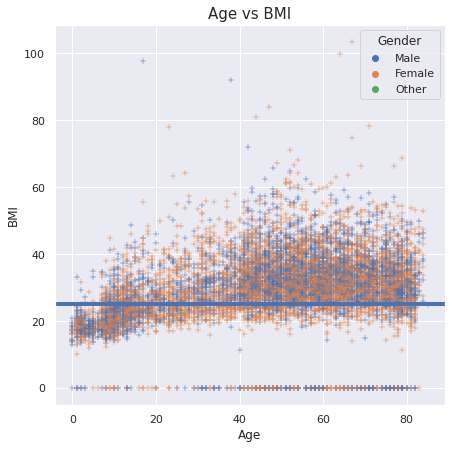

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="Age", y="BMI", hue='Gender',marker="+")
plt.title('Age vs BMI', fontsize=15)
graph.axhline(y= 25, linewidth=4, color='b', linestyle= '-')
plt.show()

#A lot have BMI > 25, which means they are overweight and obese.

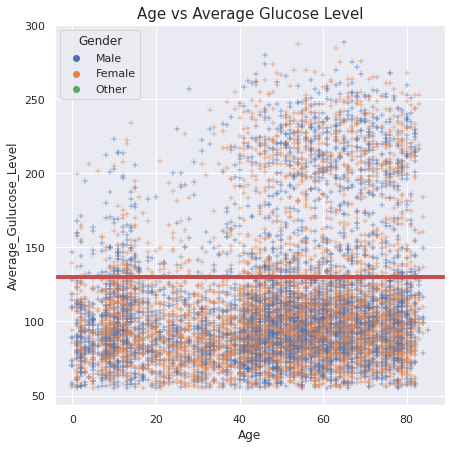

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="Age", y="Average_Gulucose_Level", hue='Gender',marker="+")
plt.title('Age vs Average Glucose Level', fontsize=15)
graph.axhline(y= 130, linewidth=4, color='r', linestyle= '-')
plt.show()

#Fact # 1 :  >150 mg/dl are relatively less as compare one below. >150 mg/dL indicates that patient might be suffering from diabetes.

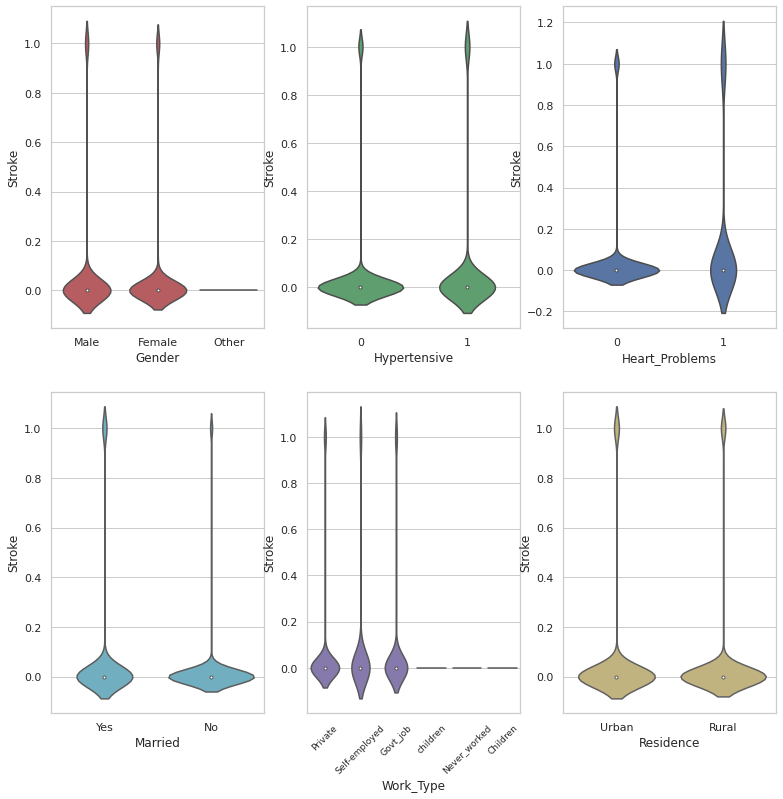

In [ ]:
#Violin Plots for visualizing qunatitative analysis

plt.figure(figsize=(13,13))
sns.set_theme(style="whitegrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'Gender', y = 'Stroke', data = dataset,color="r")
plt.subplot(2,3,2)
sns.violinplot(x = 'Hypertensive', y = 'Stroke', data = dataset,color="g")
plt.subplot(2,3,3)
sns.violinplot(x = 'Heart_Problems', y = 'Stroke', data = dataset,color="b")
plt.subplot(2,3,4)
sns.violinplot(x = 'Married', y = 'Stroke', data = dataset,color="c")
plt.subplot(2,3,5)
sns.violinplot(x = 'Work_Type', y = 'Stroke', data = dataset,color="m")
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'Residence', y = 'Stroke', data = dataset,color="y")
plt.show()

<Figure size 720x720 with 0 Axes>

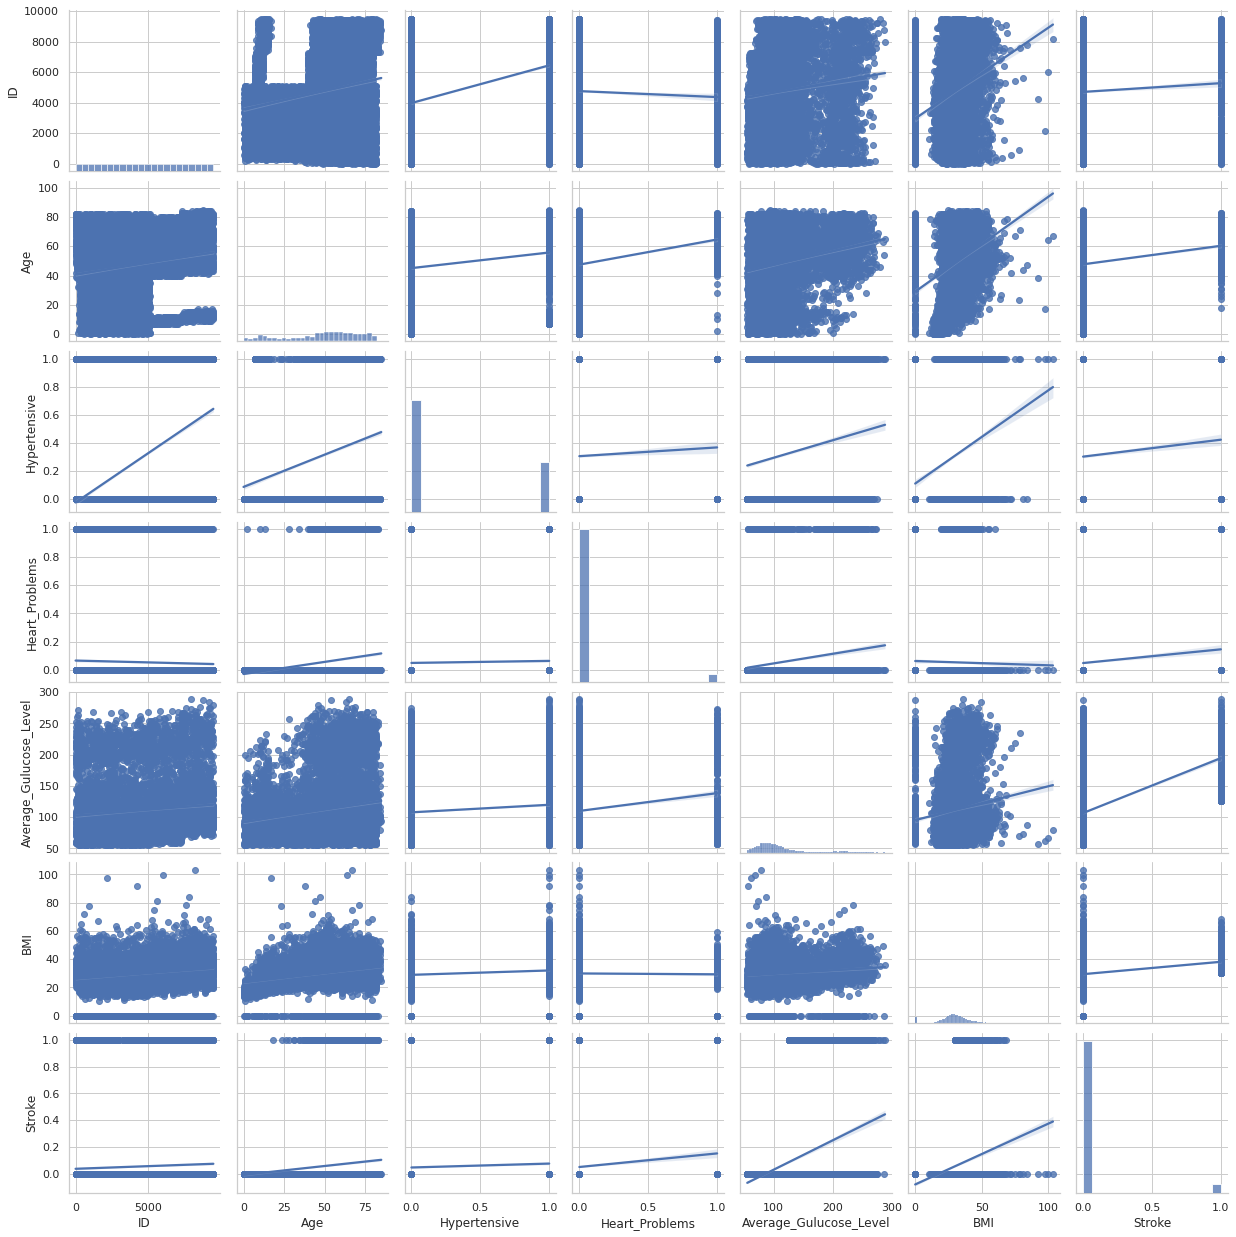

In [ ]:
#Regression Analysis of all variables
fig = plt.figure(figsize=(10,10))
sns.pairplot(dataset, kind="reg")
plt.show()

In [ ]:
# Pre-Processing

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

x[7]



array(['Female', 69, 0, 0, 'No', 'Private', 'Urban', 94.39, 22.8,
       'never smoked'], dtype=object)

In [ ]:
# Encoding
# We are using OneHotEncoder() to encode the categorical columns: 'gender', 'work_type' and 'smoking_status.

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,5,9])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))



#x[1]
#We are using LabelEncoder() to encode binary columns: 'ever_married' and 'residence_type'

#x[:,15]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 16] = le.fit_transform(x[:, 16])
x[:, 17] = le.fit_transform(x[:, 17])
x



array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [1.0, 0.0, 0.0, ..., 0, 202.21, 0.0],
       [0.0, 1.0, 0.0, ..., 0, 105.92, 32.5],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 83.51, 23.3],
       [1.0, 0.0, 0.0, ..., 0, 140.08, 23.3],
       [0.0, 1.0, 0.0, ..., 1, 279.6, 35.1]], dtype=object)

In [ ]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.4, random_state= 0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (5682, 20)
Number transactions y_train dataset:  (5682,)
Number transactions x_test dataset:  (3788, 20)
Number transactions y_test dataset:  (3788,)


In [ ]:
x_train

array([[1.0, 0.0, 0.0, ..., 1, 95.28, 29.8],
       [1.0, 0.0, 0.0, ..., 1, 88.6, 17.4],
       [0.0, 1.0, 0.0, ..., 1, 234.17, 41.8],
       ...,
       [0.0, 1.0, 0.0, ..., 0, 66.22, 34.4],
       [1.0, 0.0, 0.0, ..., 0, 72.01, 26.0],
       [1.0, 0.0, 0.0, ..., 0, 59.52, 33.2]], dtype=object)

In [ ]:
#Feature Scaling
#StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. 
#StandardScaler results in a distribution with a standard deviation equal to 1.
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[ 0.86847288, -0.8681611 , -0.01326745, ...,  1.00706473,
        -0.35828731, -0.00334735],
       [ 0.86847288, -0.8681611 , -0.01326745, ...,  1.00706473,
        -0.50343153, -1.24007383],
       [-1.15144644,  1.15185994, -0.01326745, ...,  1.00706473,
         2.65953915,  1.19348472],
       ...,
       [-1.15144644,  1.15185994, -0.01326745, ..., -0.99298483,
        -0.98970812,  0.45543828],
       [ 0.86847288, -0.8681611 , -0.01326745, ..., -0.99298483,
        -0.86390198, -0.38234418],
       [ 0.86847288, -0.8681611 , -0.01326745, ..., -0.99298483,
        -1.13528691,  0.33575507]])

In [ ]:
#SMOTE Procedure for overfitting problems

from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 323
Before OverSampling, counts of label '0': 5359 

After OverSampling, the shape of train_X: (10718, 20)
After OverSampling, the shape of train_y: (10718,) 

After OverSampling, counts of label '1': 5359
After OverSampling, counts of label '0': 5359


In [ ]:
#Model Dependencies

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from lightgbm import LGBMClassifier



from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric= 'error')])
models.append(['SGDCClssifier', SGDClassifier(random_state=42)])
models.append(['GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)])
models.append(['LGBMClassifier', LGBMClassifier(random_state=42)])
models.append(['MLP Classifier', MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=10, alpha=0.00001,
                     solver='adam', verbose=10,  random_state=21)])






lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(x_train_res, y_train_res)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  #For Cnfusion_Matrix
    accuracies = cross_val_score(estimator = model, X = x_train_res, y = y_train_res, cv = 10)   #K-Fold_Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC_AUC_Score
    precision = precision_score(y_test, y_pred)  #Precision_Score
    recall = recall_score(y_test, y_pred)  #Recall_Score
    f1 = f1_score(y_test, y_pred)  #F1_Score
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC_AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1 Score: {:.2f}'.format(f1))
    print('-----------------------------------')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :
[[3497   95]
 [  11  185]]
Accuracy Score:  0.9720168954593453

K-Fold Validation Mean Accuracy: 97.58 %

Standard Deviation: 0.53 %

ROC_AUC Score: 0.96

Precision: 0.66

Recall: 0.94

F1 Score: 0.78
-----------------------------------

SVM :
[[3535   57]
 [  13  183]]
Accuracy Score:  0.981520591341077

K-Fold Validation Mean Accuracy: 98.78 %

Standard Deviation: 0.32 %

ROC_AUC Score: 0.96

Precision: 0.76

Recall: 0.93

F1 Score: 0.84
-----------------------------------

KNeighbors :
[[3483  109]
 [  21  175]]
Accuracy Score:  0.9656810982048575

K-Fold Validation Mean Accuracy: 98.22 %

Standard Deviation: 0.31 %

ROC_AUC Score: 0.93

Precision: 0.62

Recall: 0.89

F1 Score: 0.73
-----------------------------------

GaussianNB :
[[2628  964]
 [   0  196]]
Accuracy Score:  0.7455121436114044

K-Fold Validation Mean Accuracy: 85.18 %

Standard Deviation: 0.92 %

ROC_AUC Score: 0.87

Precision: 0.17

Recall: 1.00

F1 Score: 0.29
--------------------------------

In [ ]:
#Importing GridSearch Dependencies

from sklearn.model_selection import GridSearchCV


In [ ]:
#setting parameters for SGDClassifier, XGB, GB, & LGBM
paramSGD = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}
parameters = {'random_state':[5], 'learning_rate':[0.05, 0.1, 0.15], "min_samples_split":[2,10,20]}


gridParams = {
    # 'max_depth': range (2, 10, 1),
    'num_leaves': range(21, 161, 10),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid = {'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu']}

#paramet = {'solver': ['lbfgs'], 'max_iter': [1000], 'alpha': 10.0 ** -np.arange(1, 10), 'hidden_layer_sizes':np.arange(10, 15), 'random_state':[0]}

In [ ]:
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]), 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]), 
               (GaussianNB(),[{'var_smoothing': [1e-09]}]), 
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (SGDClassifier(),paramSGD),
               (GradientBoostingClassifier(),parameters),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (LGBMClassifier(),gridParams)
              ]




In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

    # GridSearch suggest that the RandomForest and XGBoost seems best fit for the model.

    

XGBClassifier():
Best Accuracy : 99.94%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.05}

----------------

LGBMClassifier():
Best Accuracy : 99.99%
Best Parameters :  {'learning_rate': 0.05, 'num_leaves': 21}

----------------



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3592
           1       1.00      0.98      0.99       196

    accuracy                           1.00      3788
   macro avg       1.00      0.99      0.99      3788
weighted avg       1.00      1.00      1.00      3788

ROC AUC score: 1.0
Accuracy Score:  0.9989440337909187


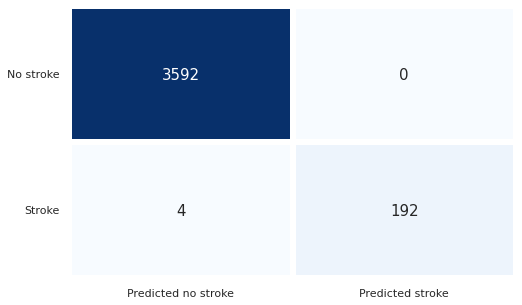

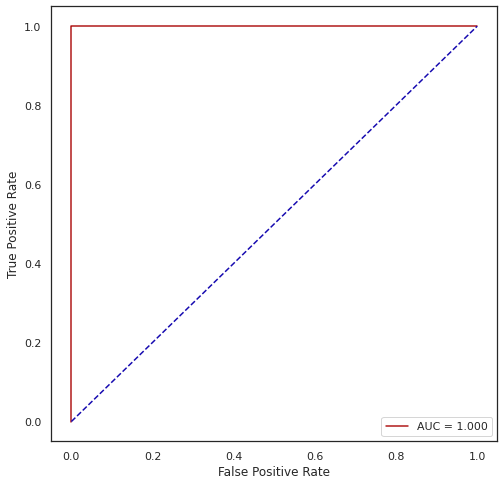

In [ ]:
#After Tuning Hyperparameters 

#RandomForest and XGBoost performance as they have high accuracy.

#Fitting RandomForest
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

#Visualizing through Confusion Matrix

plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},  yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc AUC Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#160ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3592
           1       1.00      1.00      1.00       196

    accuracy                           1.00      3788
   macro avg       1.00      1.00      1.00      3788
weighted avg       1.00      1.00      1.00      3788

ROC AUC score: 0.9999999999999999
Accuracy Score:  1.0


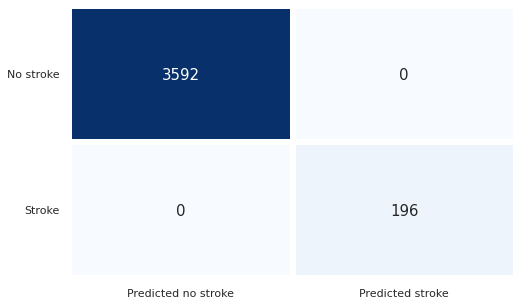

Text(0.5, 0, 'False Positive Rate')

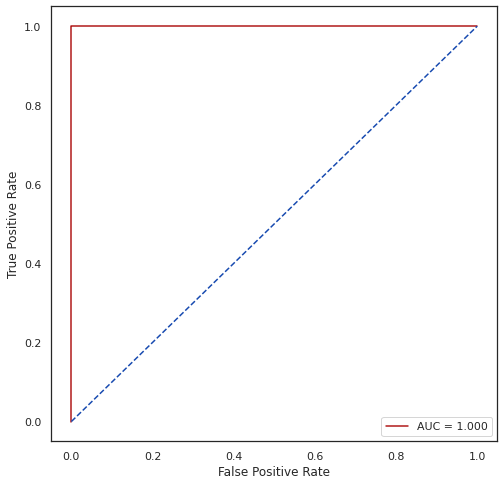

In [ ]:
#Fitting XGBClassifier
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(x_train_res, y_train_res)
y_pred = classifier.predict(x_test)
y_prob = classifier.predict_proba(x_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing through Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
df = pd.DataFrame(lst_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.regularizers import l2

In [ ]:

# function
def ann_classifier():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann


ann = KerasClassifier(build_fn = ann_classifier, batch_size = 32, epochs = 50)

In [ ]:

# 5 fold cross validation here
accuracies = cross_val_score(estimator = ann, X = x_train_res, y = y_train_res, cv = 5)

Epoch 1/50
268/268 [==============================] - 1s 2ms/step - loss: 0.6277 - accuracy: 0.7723
Epoch 2/50
268/268 [==============================] - 1s 2ms/step - loss: 0.3094 - accuracy: 0.9473
Epoch 3/50
268/268 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9764
Epoch 4/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9817
Epoch 5/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.9840
Epoch 6/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9844
Epoch 7/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9850
Epoch 8/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1326 - accuracy: 0.9853
Epoch 9/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1257 - accuracy: 0.9861
Epoch 10/50
268/268 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.9864

In [ ]:
#  Mean and standard deviation of the accuracies obtained
mean = accuracies.mean()
std_deviation = accuracies.std()
print("Accuracy: {:.2f} %".format(mean*100))
print("Standard Deviation: {:.2f} %".format(std_deviation*100))


Accuracy: 99.19 %
Standard Deviation: 0.57 %


In [ ]:
# function building
def ann_classifier(optimizer = 'adam'):
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    ann.add(tf.keras.layers.Dense(units= 8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
    tf.keras.layers.Dropout(0.6)
    ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
    ann.compile(optimizer= optimizer, loss= 'binary_crossentropy', metrics= ['accuracy'])
    return ann

In [ ]:
#ANN Model after Tuning 
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
ann.add(tf.keras.layers.Dense(units= 32, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
tf.keras.layers.Dropout(0.6)
ann.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [ ]:
ann_history = ann.fit(x_train_res, y_train_res, batch_size= 25, epochs= 150, validation_split= 0.2)

Epoch 1/150
343/343 [==============================] - 2s 3ms/step - loss: 0.5443 - accuracy: 0.9433 - val_loss: 0.2728 - val_accuracy: 0.9958
Epoch 2/150
343/343 [==============================] - 1s 2ms/step - loss: 0.2236 - accuracy: 0.9790 - val_loss: 0.1900 - val_accuracy: 0.9949
Epoch 3/150
343/343 [==============================] - 1s 2ms/step - loss: 0.1631 - accuracy: 0.9817 - val_loss: 0.1614 - val_accuracy: 0.9972
Epoch 4/150
343/343 [==============================] - 1s 2ms/step - loss: 0.1384 - accuracy: 0.9847 - val_loss: 0.1403 - val_accuracy: 0.9986
Epoch 5/150
343/343 [==============================] - 1s 2ms/step - loss: 0.1248 - accuracy: 0.9862 - val_loss: 0.1199 - val_accuracy: 0.9991
Epoch 6/150
343/343 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9865 - val_loss: 0.0982 - val_accuracy: 1.0000
Epoch 7/150
343/343 [==============================] - 1s 2ms/step - loss: 0.1086 - accuracy: 0.9879 - val_loss: 0.0861 - val_accuracy: 1.0000

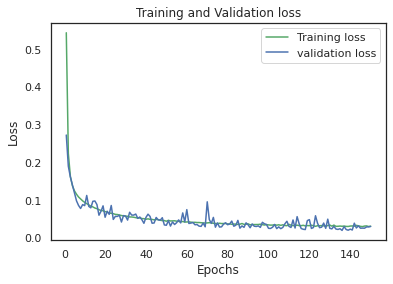

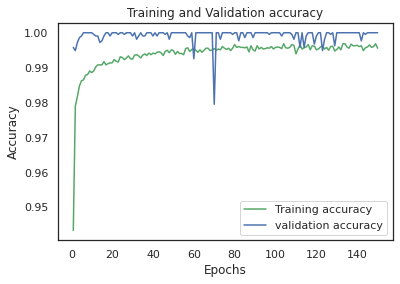

In [ ]:
loss_train = ann_history.history['loss']
loss_val = ann_history.history['val_loss']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#ACCURACY Graph
loss_train = ann_history.history['accuracy']
loss_val = ann_history.history['val_accuracy']
epochs = range(1,151)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Confusion Matrix:
 [[3592    0]
 [   0  196]]
Accuracy:  1.0


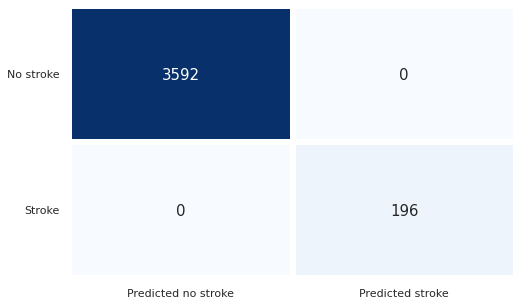

In [ ]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n',cm)
# Accuracy
accuracy = accuracy_score(y_pred,y_test)
print('Accuracy: ',accuracy)
#onfusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()
#Therefore, after the multiple visualizations of our and going through all the performance of the models.
# hyperparameters tuned with the help of GridSearch to get models. After that, I came to conclusion that RandomForestClassifier is best model for this dataset.